# Practice for Module 2

We are familiar with univariate, bivariate and multivariate analysis of data from the lab notebooks of week 1 and 2. We have seen how visualizations help us in analyzing the data and their limitations in analyzing multi dimensional data. 

Lets continue our discussion on bivariate and multi variate data analysis by working through this practice notebook. You will be provided with code snippets to complete/modify the code for generating desired output. We will look into the bikeshare dataset on which we worked in week1.

__Remember__ to look for the `<what goes in here>` and similar prompts to complete the code. 

### Loading data

Load the data `/dsa/data/all_datasets/bikeshare/hour.csv` into R and name the datframe as `bikeshare_data`

In [1]:
bikeshare_data <- read.csv("/dsa/data/all_datasets/bikeshare/hour.csv", header = T, sep=",")
head(bikeshare_data)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


First few rows suggests most of the data is either numeric or discrete in nature except for date column. Again we are interetsed in identifying the independent variables which are related to variable `cnt`. 

Lets run summary() on dataset. 

In [2]:
summary(bikeshare_data)

    instant         dteday              season            yr        
 Min.   :    1   Length:17379       Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Mode  :character   Median :3.000   Median :1.0000  
 Mean   : 8690                      Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379                      Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weathersit         te

**Activity 1:** What is the structure of the dataset.

In [3]:
# Your code for activity 1 goes here
str(bikeshare_data)

'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "2011-01-01" "2011-01-01" "2011-01-01" "2011-01-01" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


We know the dimension of the dataset and datatypes of all features. Lets plot some scatter plots for cnt variable against rest of the independent variables.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



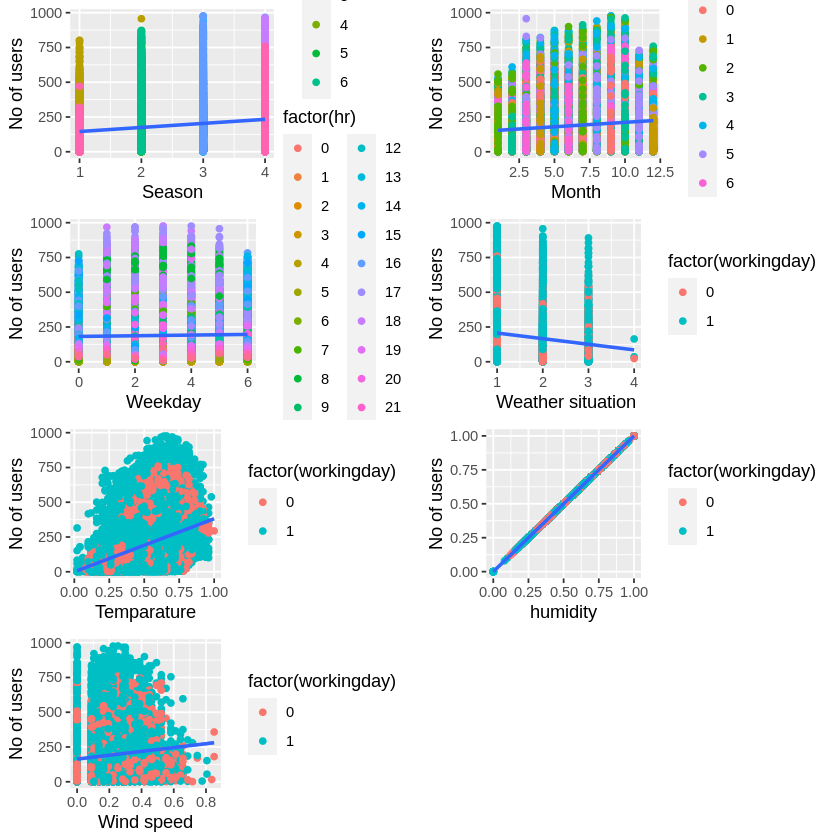

In [4]:
#package for plotting graphs
library(ggplot2)

#package for arranging multiple graphs in a grid layout
library(gridExtra)

grid.arrange(
    ggplot(bikeshare_data, aes(x=season,y=cnt)) + xlab("Season")+ ylab("No of users") + 
    geom_point(aes(colour = factor(mnth))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=mnth,y=cnt)) + xlab("Month")+ ylab("No of users") + 
    geom_point(aes(colour = factor(weekday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=weekday,y=cnt)) + xlab("Weekday")+ ylab("No of users") + 
    geom_point(aes(colour = factor(hr))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=weathersit,y=cnt)) + xlab("Weather situation")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=temp,y=cnt)) + xlab("Temparature")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=hum,y=hum)) + xlab("humidity")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=windspeed,y=cnt)) + xlab("Wind speed")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ncol=2)    

There are some positive linear relationships between cnt and season, month, weather situation, temparature, humidity, windspeed. 

**Activity 2:** Plot individual scatter plots between variables 

    2.a cnt and month
    2.b cnt and temp
    2.c cnt and hum
    2.d cnt and windspeed
    2.e cnt and hr
    2.f cnt and weathersit

Use weekday for plotting points with different colors. Add a regression line. Calculate pearson correlation coefficients for all  pairs of variables.

`geom_smooth()` using formula 'y ~ x'




	Pearson's product-moment correlation

data:  bikeshare_data$mnth and bikeshare_data$cnt
t = 16.02, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1059602 0.1352628
sample estimates:
      cor 
0.1206378 


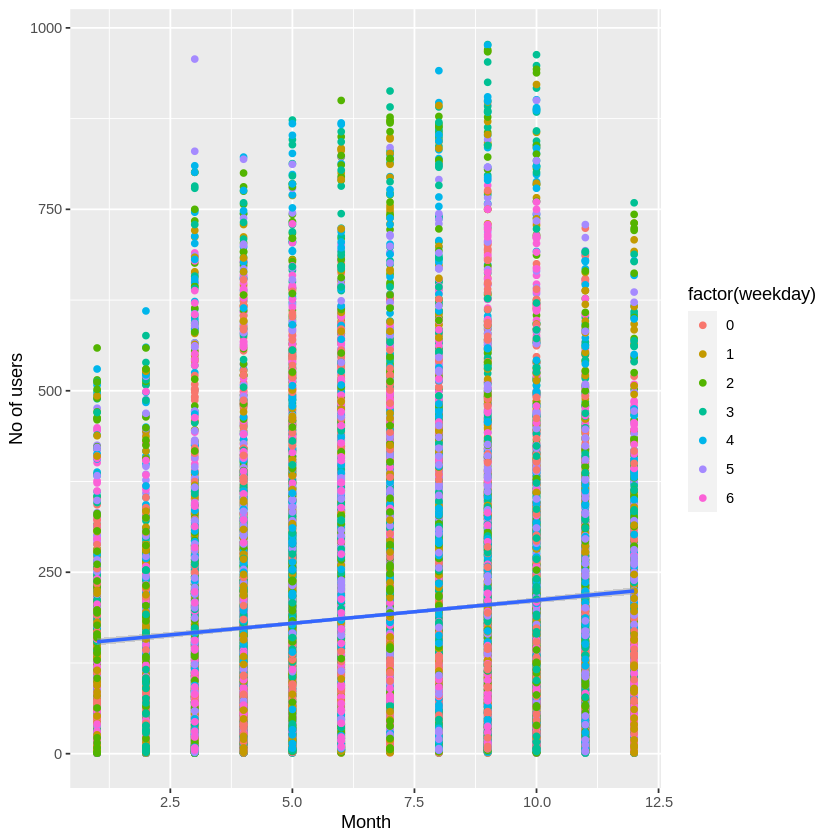

In [5]:
# Your code for activity 2.a goes here
ggplot(bikeshare_data, aes(x = mnth, y = cnt)) + 
    xlab("Month") + 
    ylab("No of users") + 
    geom_point(aes(color = factor(weekday))) + 
    geom_smooth(method = lm)

cor.test(bikeshare_data$mnth, bikeshare_data$cnt)

`geom_smooth()` using formula 'y ~ x'




	Pearson's product-moment correlation

data:  bikeshare_data$temp and bikeshare_data$cnt
t = 58.352, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3922653 0.4171296
sample estimates:
      cor 
0.4047723 


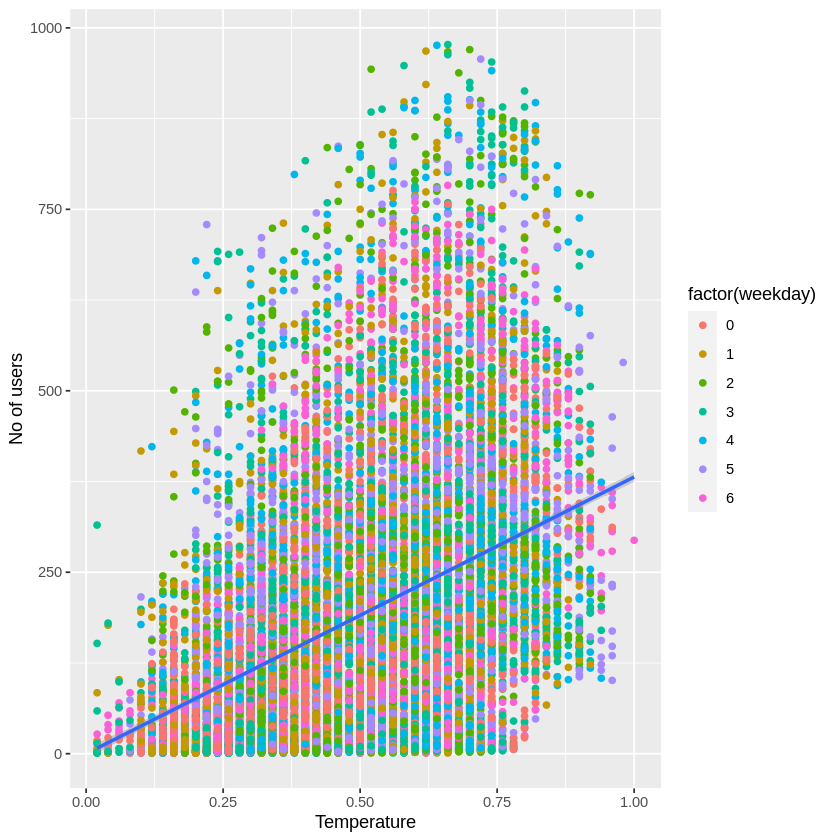

In [6]:
# Your code for activity 2.b goes here
ggplot(bikeshare_data, aes(x = temp, y = cnt)) + 
    xlab("Temperature") + 
    ylab("No of users") + 
    geom_point(aes(color = factor(weekday))) + 
    geom_smooth(method = lm)

cor.test(bikeshare_data$temp, bikeshare_data$cnt)

`geom_smooth()` using formula 'y ~ x'




	Pearson's product-moment correlation

data:  bikeshare_data$hum and bikeshare_data$cnt
t = -44.976, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3361645 -0.3095292
sample estimates:
       cor 
-0.3229107 


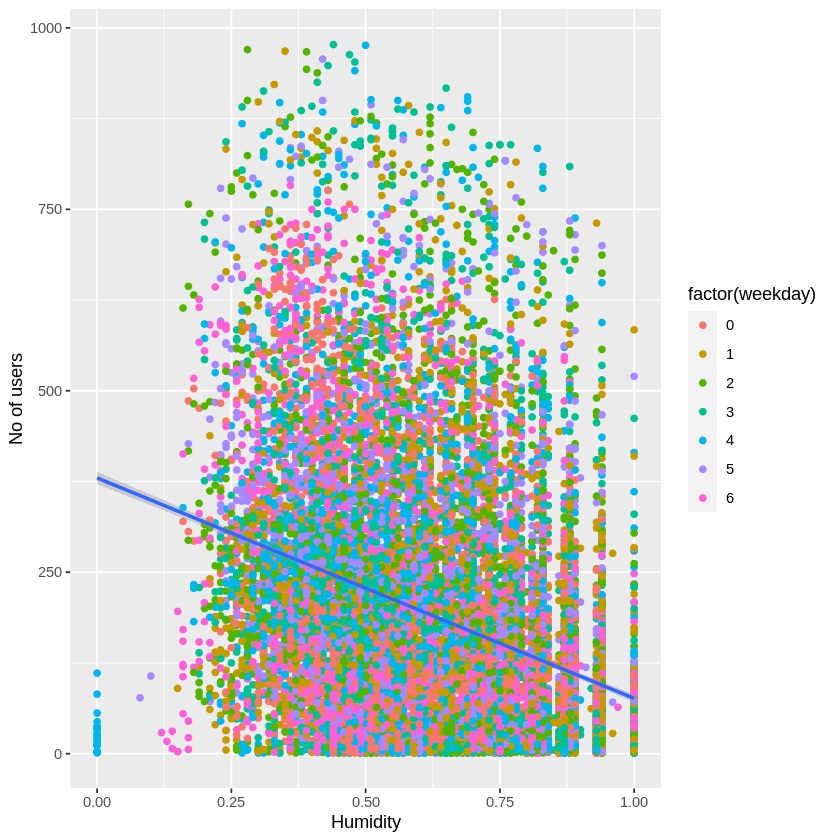

In [7]:
# Your code for activity 2.c goes here
ggplot(bikeshare_data, aes(x = hum, y = cnt)) + 
    xlab("Humidity") + 
    ylab("No of users") + 
    geom_point(aes(color = factor(weekday))) + 
    geom_smooth(method = lm)

cor.test(bikeshare_data$hum, bikeshare_data$cnt)

`geom_smooth()` using formula 'y ~ x'




	Pearson's product-moment correlation

data:  bikeshare_data$windspeed and bikeshare_data$cnt
t = 12.344, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07847495 0.10795176
sample estimates:
       cor 
0.09323378 


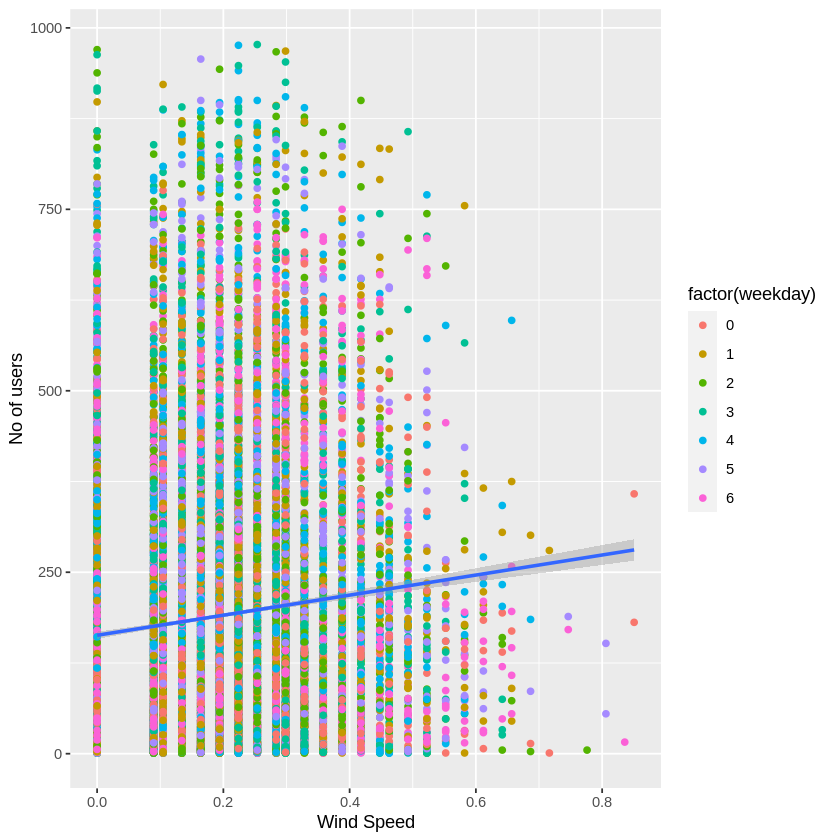

In [8]:
# Your code for activity 2.d goes here
ggplot(bikeshare_data, aes(x = windspeed, y = cnt)) + 
    xlab("Wind Speed") + 
    ylab("No of users") + 
    geom_point(aes(color = factor(weekday))) + 
    geom_smooth(method = lm)

cor.test(bikeshare_data$windspeed, bikeshare_data$cnt)

`geom_smooth()` using formula 'y ~ x'




	Pearson's product-moment correlation

data:  bikeshare_data$hr and bikeshare_data$cnt
t = 56.521, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3814387 0.4065571
sample estimates:
      cor 
0.3940715 


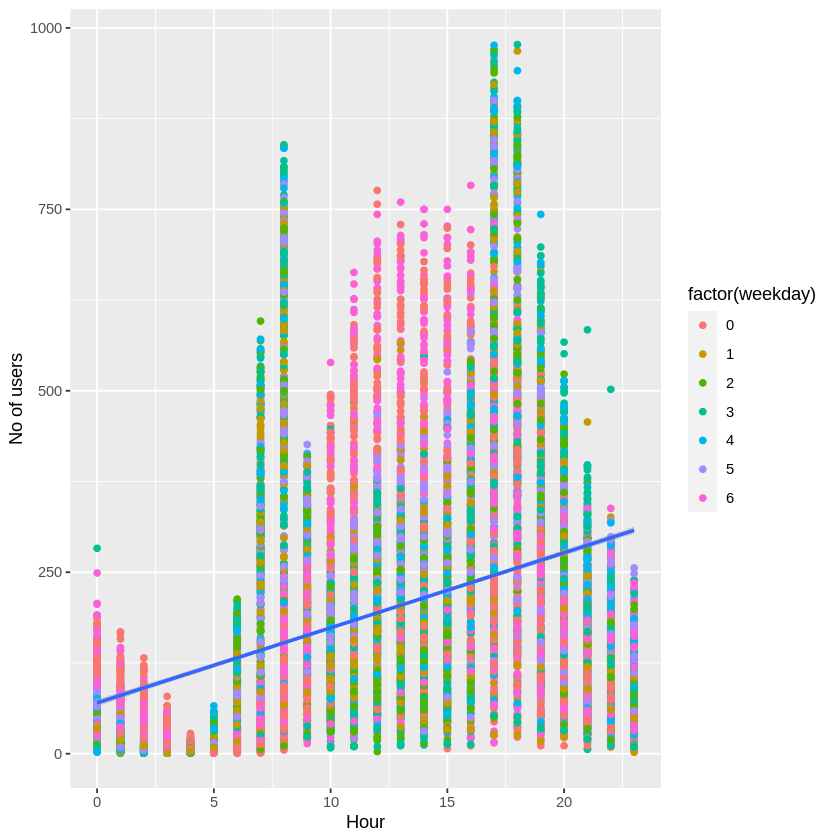

In [9]:
# Your code for activity 2.e goes here
ggplot(bikeshare_data, aes(x = hr, y = cnt)) + 
    xlab("Hour") + 
    ylab("No of users") + 
    geom_point(aes(color = factor(weekday))) + 
    geom_smooth(method = lm)

cor.test(bikeshare_data$hr, bikeshare_data$cnt)

`geom_smooth()` using formula 'y ~ x'




	Pearson's product-moment correlation

data:  bikeshare_data$weathersit and bikeshare_data$cnt
t = -18.968, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1569614 -0.1278292
sample estimates:
       cor 
-0.1424261 


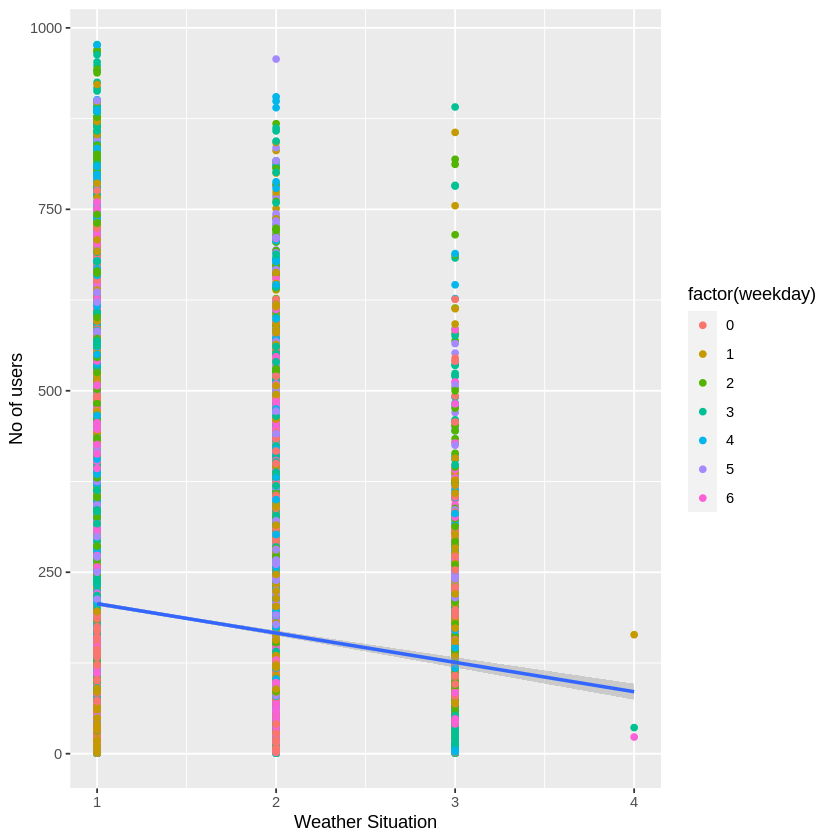

In [10]:
# Your code for activity 2.f goes here
ggplot(bikeshare_data, aes(x = weathersit, y = cnt)) + 
    xlab("Weather Situation") + 
    ylab("No of users") + 
    geom_point(aes(color = factor(weekday))) + 
    geom_smooth(method = lm)

cor.test(bikeshare_data$weathersit, bikeshare_data$cnt)

**Activity 3:** Plot a 3 dimensional plot using scatterplot3d package. plot temp on x-axis, hum on y-axis and cnt on z-axis. use season as the 4 th dimension in the form of color.  

Warning message in if (distinct) c[!duplicated(t(col2rgb(c)))] else c:
“the condition has length > 1 and only the first element will be used”


ERROR: Error in legend(plot$xyz.convert(0.9, 0.9, 800), legend = levels(colors(bikeshare_data$season)), : 'legend' is of length 0


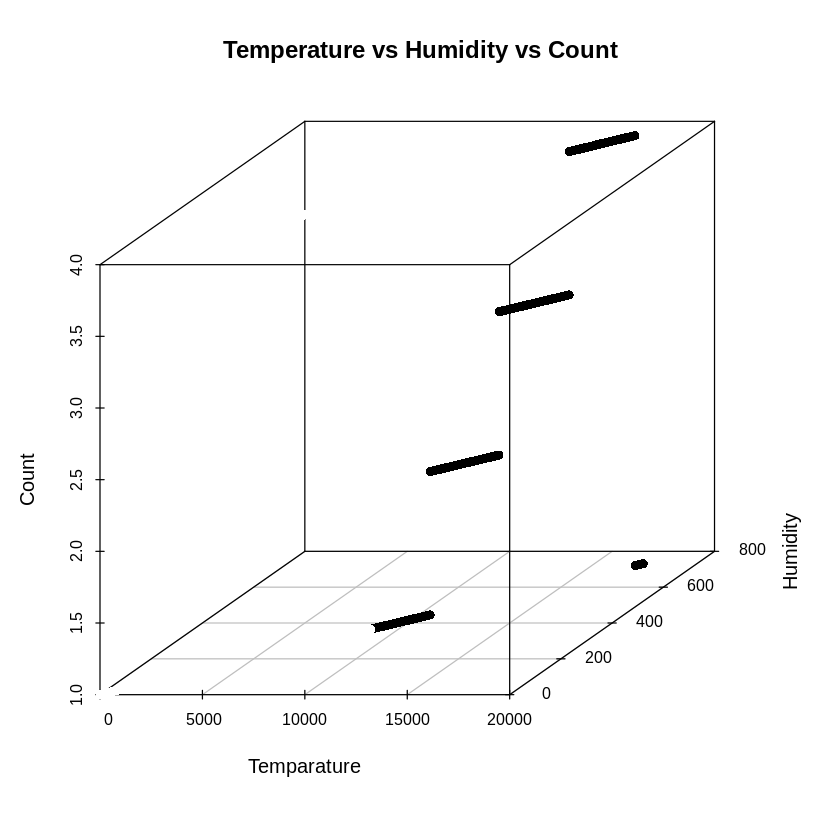

In [23]:
# Your code for activity 3 goes here
library(scatterplot3d)

#Assigning each unique value in season variable a different color
colors <- c("orange", "green", "magenta","blue")
colors <- colors[bikeshare_data$season]

#Use dplyr to select columns temp, hum, cnt from bikeshare_data and supply as data below
scatterplot3d(bikeshare_data, angle = 45, color = colors, pch = 16,
              main="Temperature vs Humidity vs Count",
              xlab = "Temparature",
              ylab = "Humidity",
              zlab = "Count")

              #legend(plot$xyz.convert(0.9,0.9,800), legend = levels(bikeshare_data$season),
              #legend(plot$xyz.convert(0.9,0.9,800), legend = levels(factor(bikeshare_data$season)),
              #legend(plot$xyz.convert(0.9,0.9,800), legend = levels(c(bikeshare_data$season)),
              #legend(plot$xyz.convert(0.9,0.9,800), legend = levels(as.data.frame(bikeshare_data$season)),
              legend(plot$xyz.convert(0.9,0.9,800), legend = levels(colors(bikeshare_data$season)),
                     col =  c("orange", "green", "magenta", "blue"), pch = 16)

**Activity 4:** Plot a graph in ggplot for cnt vs temp using hr for color parameter as third dimension. Use dplyr to supply the input data to ggplot() command.


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




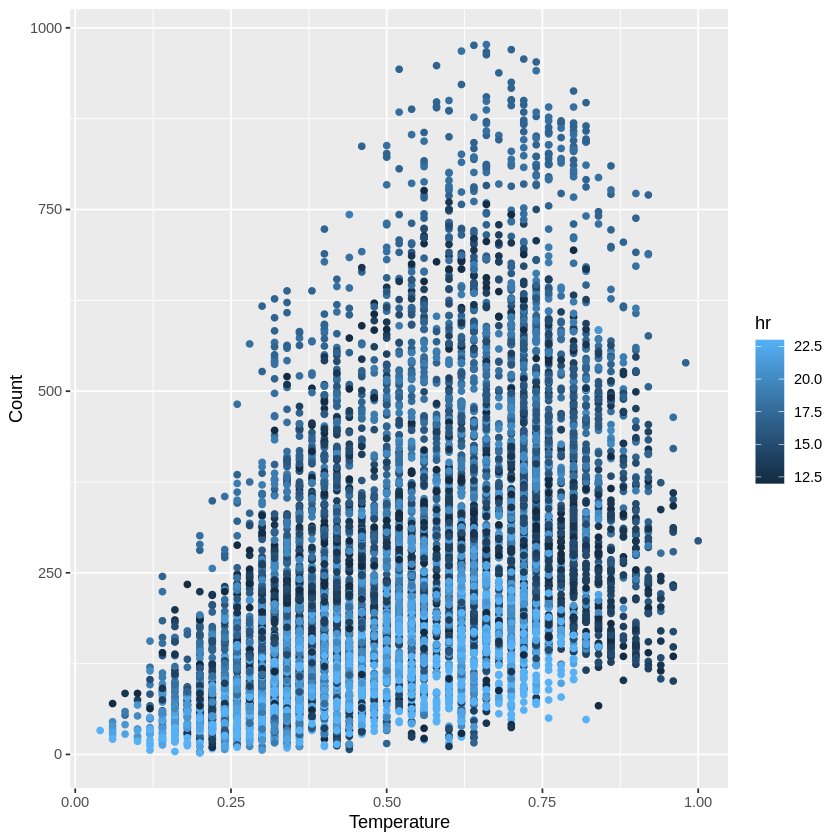

In [24]:
# Your code for activity 4 goes here

library(dplyr)

#Select temp, cnt and hr variables from bikeshare_data using select function in dplyr 
bikeshare_data %>%
    select(temp, cnt, hr) %>%
#filter hour to be greater than 11
    filter(hr > 11) %>% ggplot(aes(x = temp, y = cnt, color = hr)) + 
    xlab("Temperature") + ylab("Count") +  geom_point()

**Activity 5:** Use dplyr to group the data by weekday and summerise casual, registered and cnt variables using mean function.

In [29]:
bikeshare_data %>%
    group_by(weekday) %>%
    summarise_each(funs(mean), casual, registered, cnt)

bikeshare_data %>%
    group_by(weekday) %>%
    summarise(across(c(casual, registered, cnt), mean))

weekday,casual,registered,cnt
<int>,<dbl>,<dbl>,<dbl>
0,56.16347,121.3054,177.4688
1,28.55345,155.1912,183.7447
2,23.58051,167.6584,191.2389
3,23.15919,167.9713,191.1305
4,24.87252,171.5641,196.4367
5,31.45879,164.6771,196.1359
6,61.24682,128.9630,190.2098


weekday,casual,registered,cnt
<int>,<dbl>,<dbl>,<dbl>
0,56.16347,121.3054,177.4688
1,28.55345,155.1912,183.7447
2,23.58051,167.6584,191.2389
3,23.15919,167.9713,191.1305
4,24.87252,171.5641,196.4367
5,31.45879,164.6771,196.1359
6,61.24682,128.9630,190.2098


**Activity 6:** Use dplyr to group the data by weekday and hr and summarize the data in descending order.

In [30]:
bikeshare_data %>%
    group_by(weekday, hr) %>%
    summarise(bikeshare_count = n()) %>%
    arrange(desc(bikeshare_count))

`summarise()` has grouped output by 'weekday'. You can override using the `.groups` argument.



weekday,hr,bikeshare_count
<int>,<int>,<int>
0,7,105
0,8,105
0,9,105
0,10,105
0,11,105
0,12,105
0,13,105
0,14,105
0,15,105
